### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### Loading the given dataset into a Panda Dataframe

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Dataset Evaluation and Null Checks

In [3]:
# checking the shape of dataset
df.shape 

(9240, 37)

In [4]:
# checking the null values in data
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [5]:
# checking the NA values in data
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Droping columns that are not required

In [8]:
cols_todrop = ['Prospect ID',
               'Lead Number',
               'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content',
               'Get updates on DM Content',
               'Asymmetrique Activity Index',
               'Asymmetrique Profile Index',
               'I agree to pay the amount through cheque',
               'A free copy of Mastering The Interview','Last Notable Activity','Last Activity',
              'Do Not Email','Do Not Call','City','Country','Specialization']


df = df.drop(cols_todrop,axis=1)

#### Droping these columns since there is more then 30% of data missing

In [9]:
cols_todrop2 = ['Asymmetrique Activity Score',
               'Asymmetrique Profile Score',
                'Lead Quality',
                'Tags']

df = df.drop(cols_todrop2,axis=1)

### Data Cleaning

Droping rows that has junk data, in the dataset following Columns have junk data called 'Select'

- Lead Profile
- City
- How did you hear about X Education

In [10]:
df = df[df['Lead Profile'] != 'Select']
df = df[df['How did you hear about X Education'] != 'Select']


In [11]:
df.shape

(3232, 17)

In [12]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile'],
      dtype='object')

#### Renaming long columns for better understanding and processing

In [13]:
df.rename(columns={
                   'Total Time Spent on Website': 'Time_Spent_Website', 
                   'Page Views Per Visit': 'Pages_Viewed',
                    'How did you hear about X Education':'Heard_From',
    'What is your current occupation':'Current_Occupation',
    'What matters most to you in choosing a course':'Reason_to_Choose'
}, inplace=True)

In [14]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Pages_Viewed', 'Heard_From',
       'Current_Occupation', 'Reason_to_Choose', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile'],
      dtype='object')

### EDA

<AxesSubplot:>

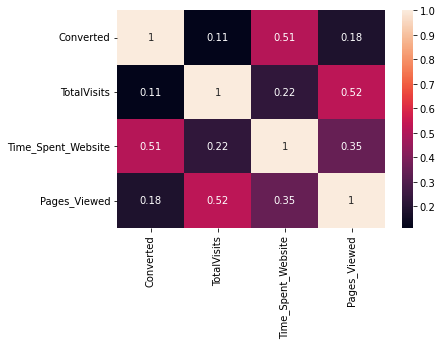

In [15]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.heatmap(df.corr(),annot=True)

In [16]:
df.corr()

,Converted,TotalVisits,Time_Spent_Website,Pages_Viewed
Converted,1.000000,0.111699,0.510540,0.183113
TotalVisits,0.111699,1.000000,0.222768,0.521411
Time_Spent_Website,0.510540,0.222768,1.000000,0.345111
Pages_Viewed,0.183113,0.521411,0.345111,1.000000


### Bivarientie Analysis

----------- Lead Origin Vs Lead Origin --------------------------


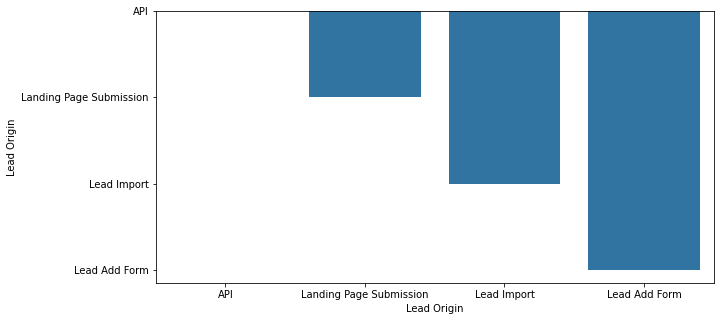

----------- Lead Source Vs Lead Origin --------------------------


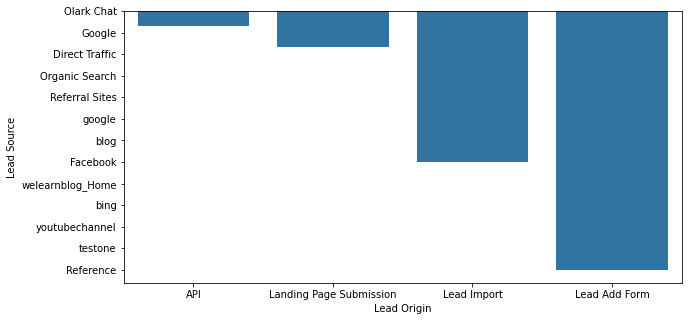

----------- Converted Vs Lead Origin --------------------------


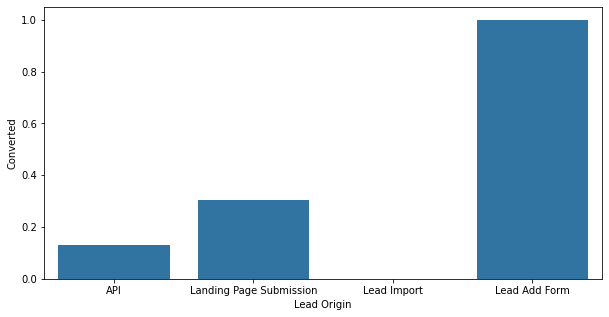

----------- TotalVisits Vs Lead Origin --------------------------


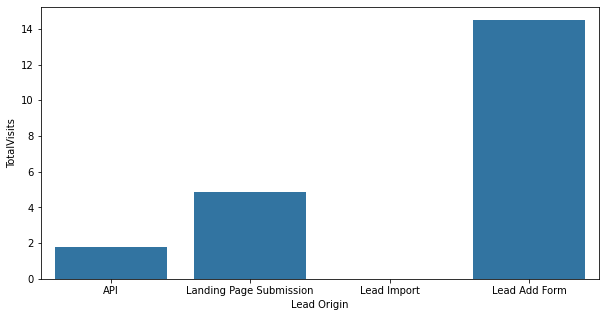

----------- Time_Spent_Website Vs Lead Origin --------------------------


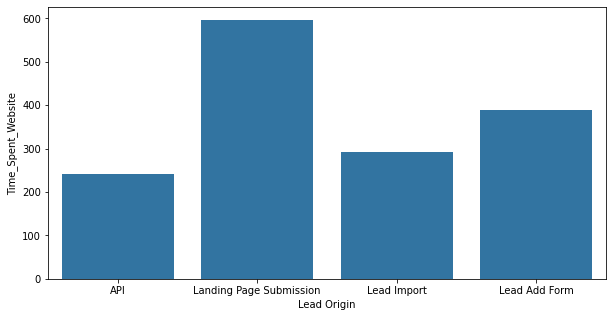

----------- Pages_Viewed Vs Lead Origin --------------------------


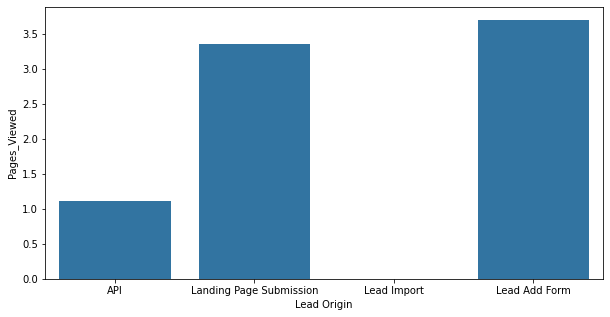

----------- Heard_From Vs Lead Origin --------------------------


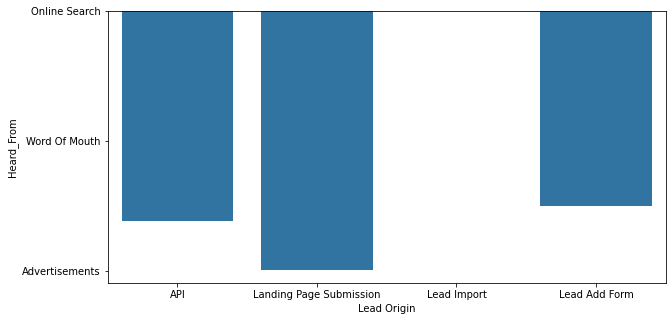

----------- Current_Occupation Vs Lead Origin --------------------------


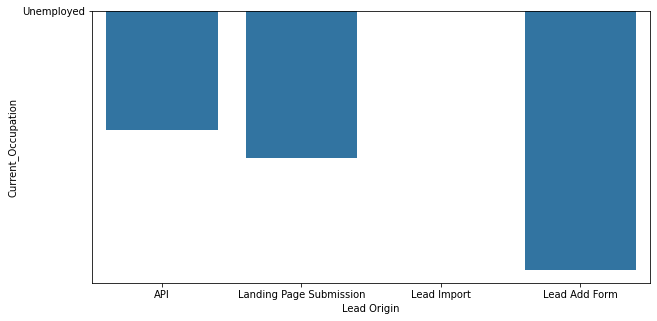

----------- Reason_to_Choose Vs Lead Origin --------------------------


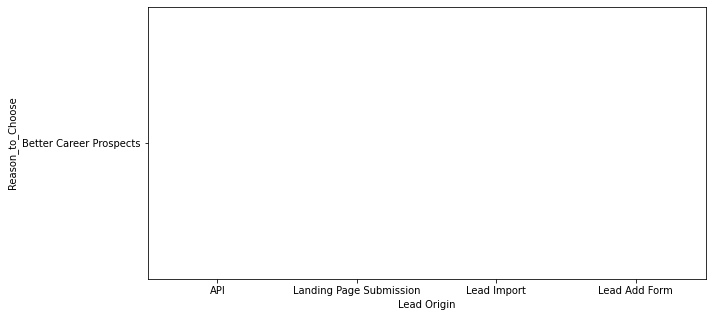

----------- Search Vs Lead Origin --------------------------


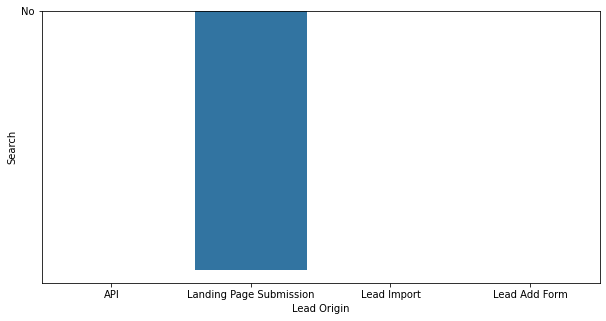

----------- Magazine Vs Lead Origin --------------------------


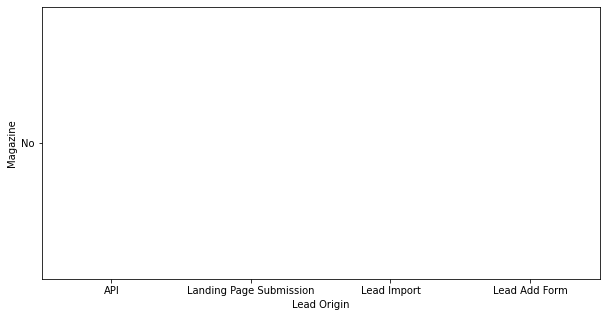

----------- Newspaper Article Vs Lead Origin --------------------------


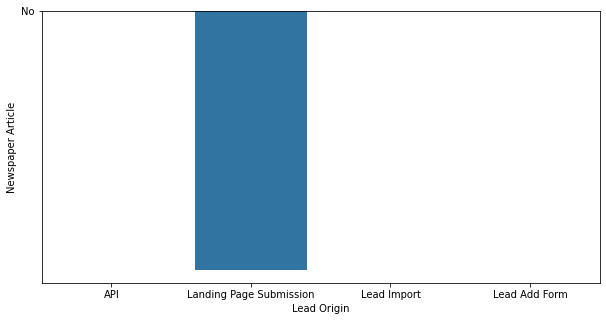

----------- X Education Forums Vs Lead Origin --------------------------


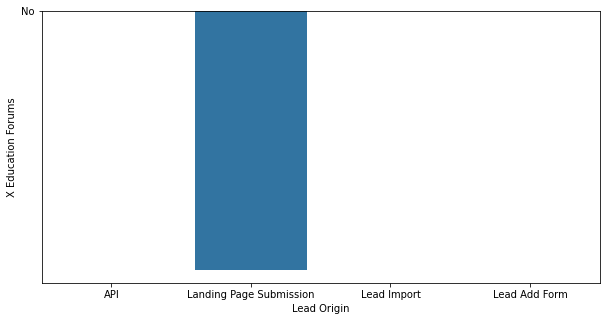

----------- Newspaper Vs Lead Origin --------------------------


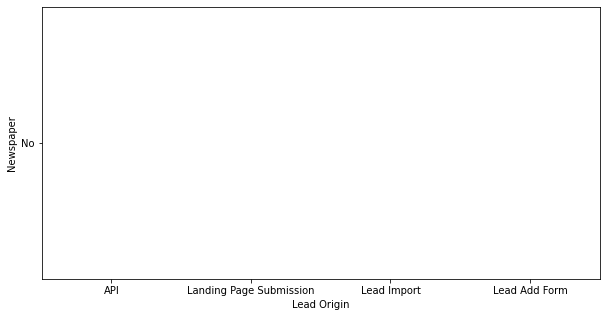

----------- Digital Advertisement Vs Lead Origin --------------------------


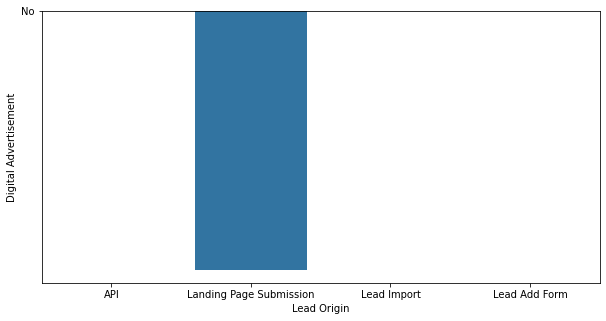

----------- Through Recommendations Vs Lead Origin --------------------------


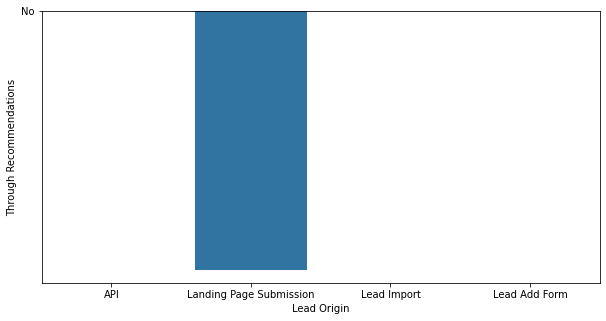

----------- Lead Profile Vs Lead Origin --------------------------


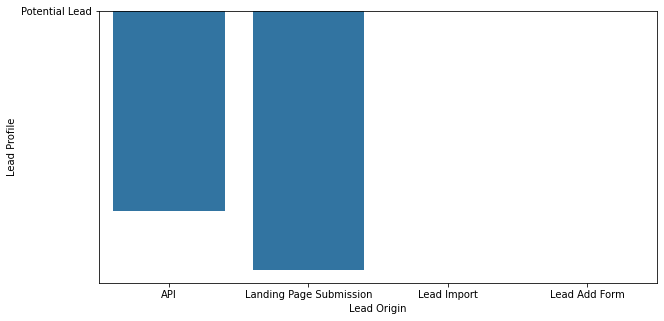

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
for i in df.columns:
    print("-----------",i,"Vs Lead Origin","--------------------------")
    sns.barplot(x=df["Lead Origin"],y=df[i],ci=None)
    plt.show()

----------- Lead Origin Vs Converted --------------------------


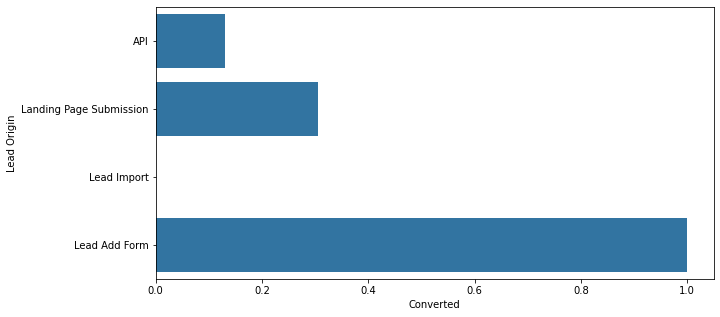

----------- Lead Source Vs Converted --------------------------


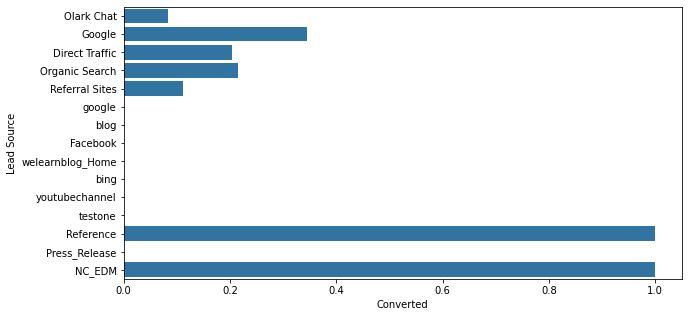

----------- Converted Vs Converted --------------------------


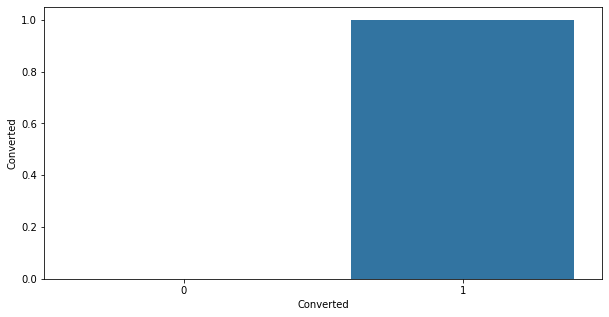

----------- TotalVisits Vs Converted --------------------------


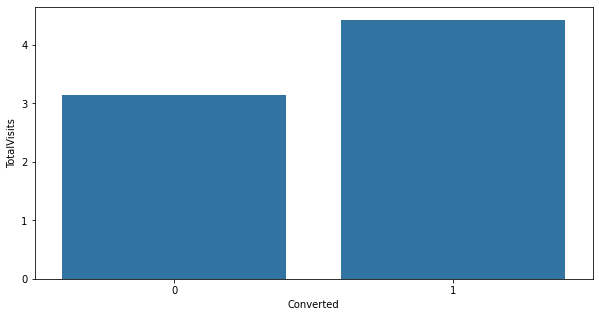

----------- Time_Spent_Website Vs Converted --------------------------


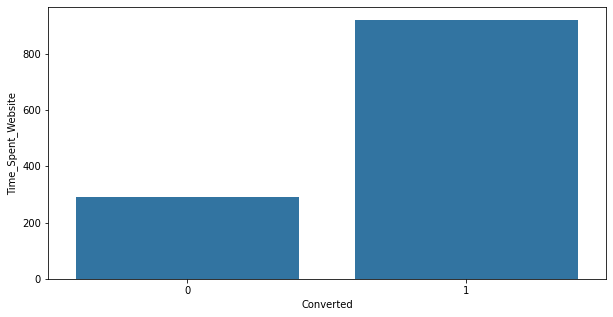

----------- Pages_Viewed Vs Converted --------------------------


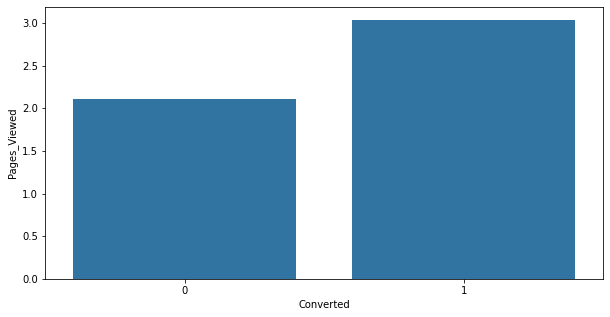

----------- Heard_From Vs Converted --------------------------


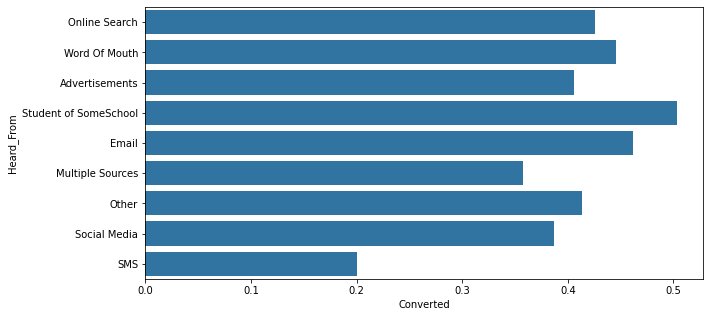

----------- Current_Occupation Vs Converted --------------------------


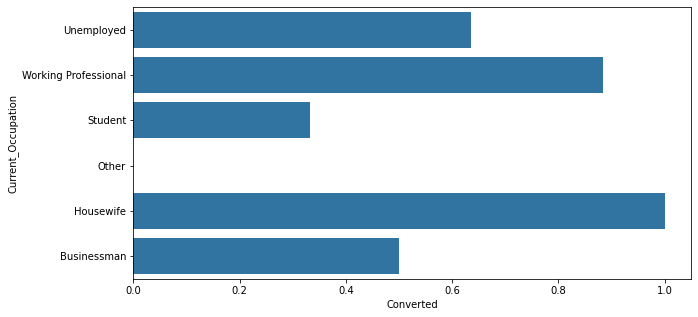

----------- Reason_to_Choose Vs Converted --------------------------


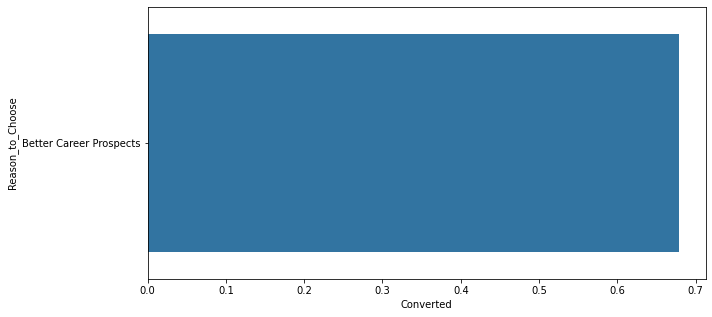

----------- Search Vs Converted --------------------------


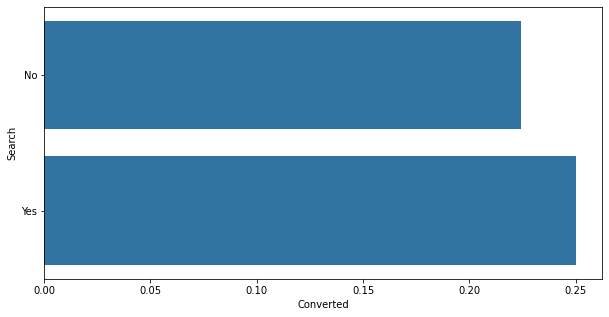

----------- Magazine Vs Converted --------------------------


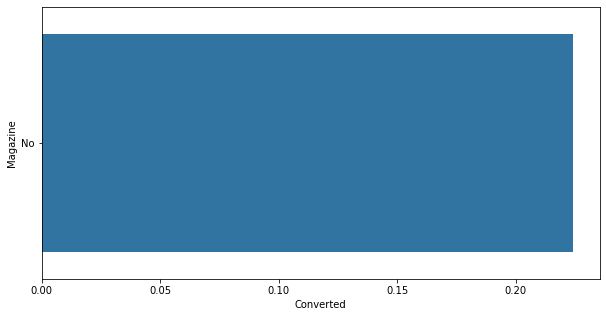

----------- Newspaper Article Vs Converted --------------------------


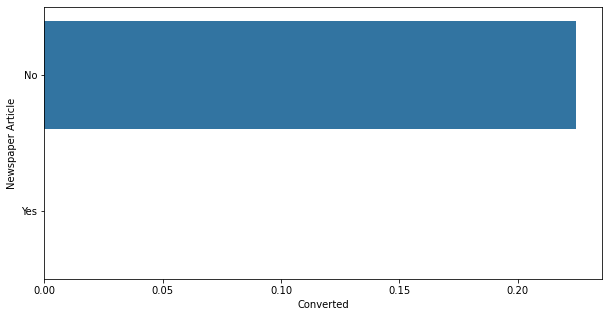

----------- X Education Forums Vs Converted --------------------------


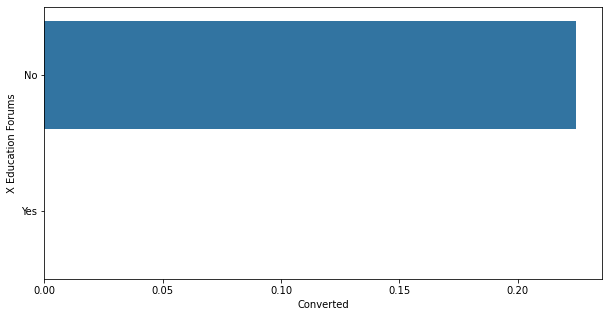

----------- Newspaper Vs Converted --------------------------


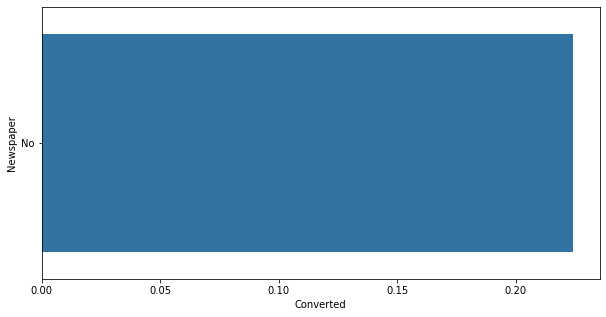

----------- Digital Advertisement Vs Converted --------------------------


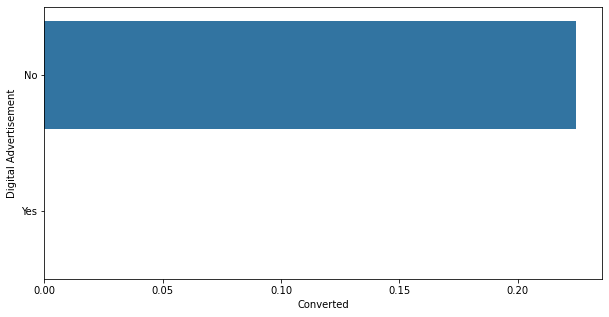

----------- Through Recommendations Vs Converted --------------------------


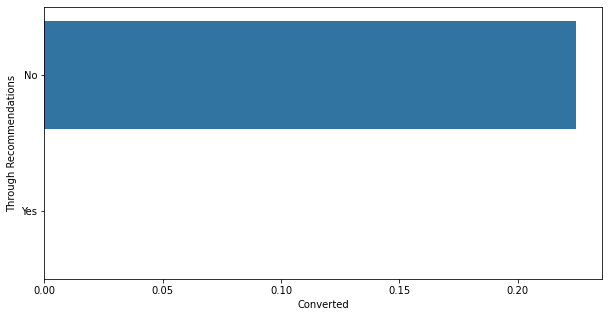

----------- Lead Profile Vs Converted --------------------------


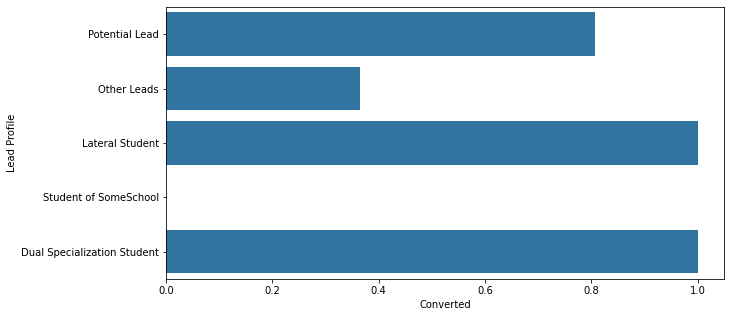

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]
for i in df.columns:
    print("-----------",i,"Vs Converted","--------------------------")
    sns.barplot(x=df["Converted"],y=df[i],ci=None)
    plt.show()

----------- Lead Origin Vs Heard_From --------------------------


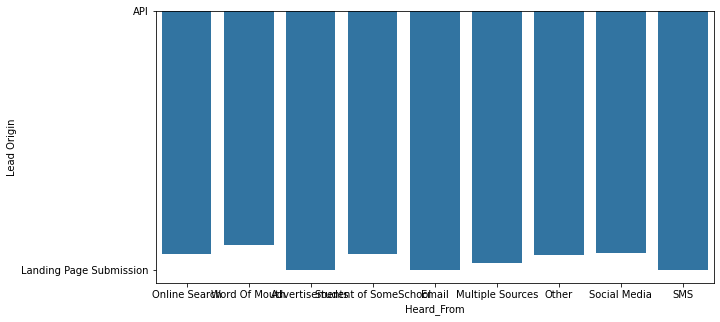

----------- Lead Source Vs Heard_From --------------------------


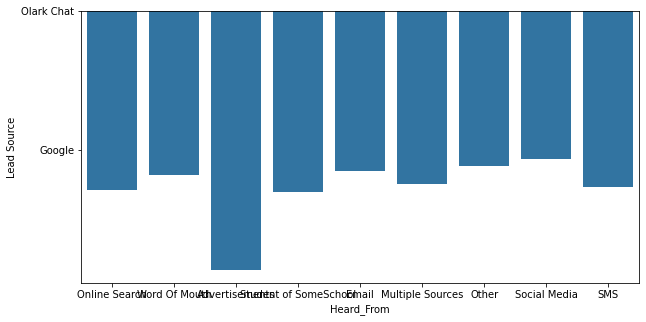

----------- Converted Vs Heard_From --------------------------


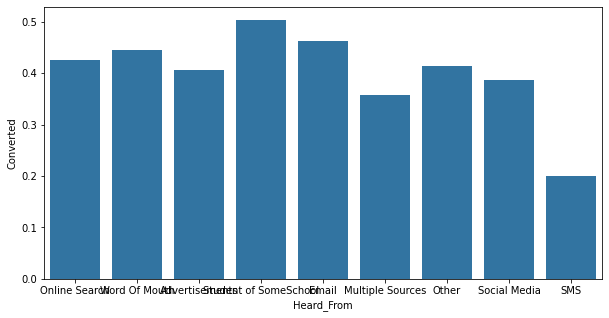

----------- TotalVisits Vs Heard_From --------------------------


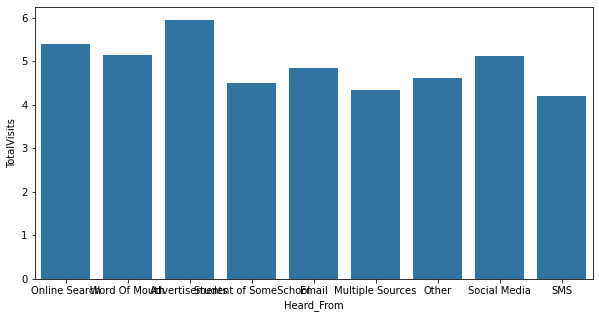

----------- Time_Spent_Website Vs Heard_From --------------------------


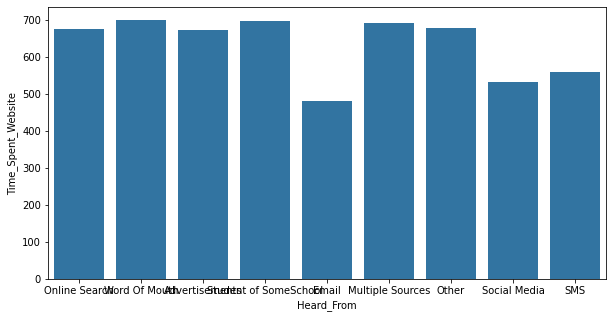

----------- Pages_Viewed Vs Heard_From --------------------------


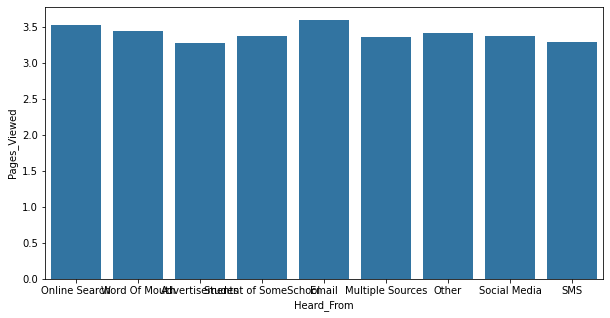

----------- Heard_From Vs Heard_From --------------------------


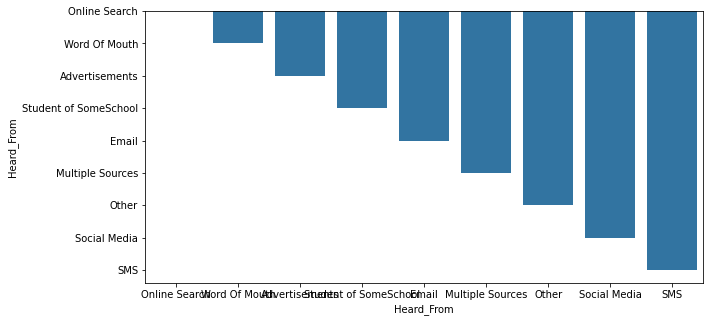

----------- Current_Occupation Vs Heard_From --------------------------


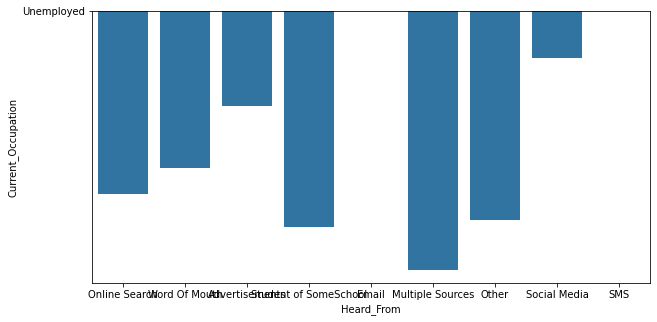

----------- Reason_to_Choose Vs Heard_From --------------------------


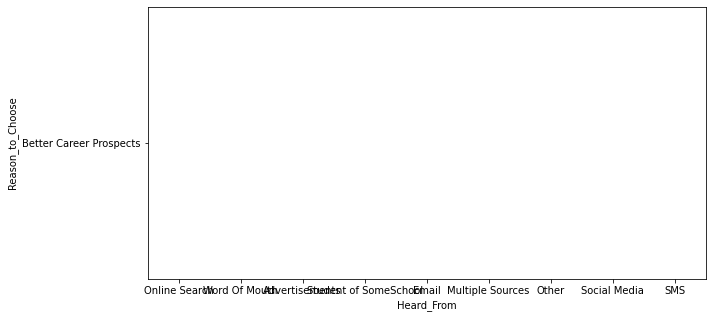

----------- Search Vs Heard_From --------------------------


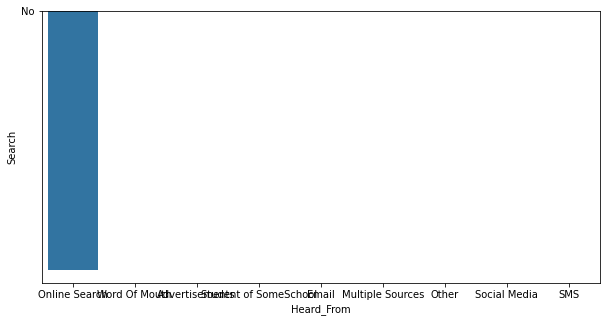

----------- Magazine Vs Heard_From --------------------------


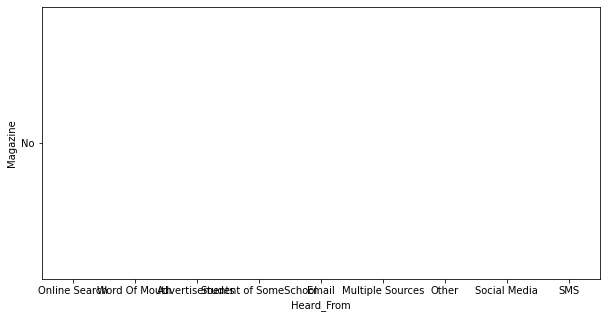

----------- Newspaper Article Vs Heard_From --------------------------


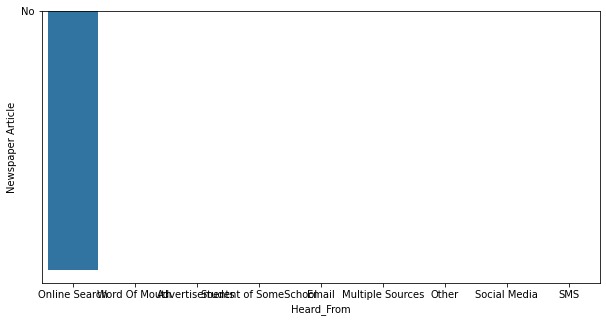

----------- X Education Forums Vs Heard_From --------------------------


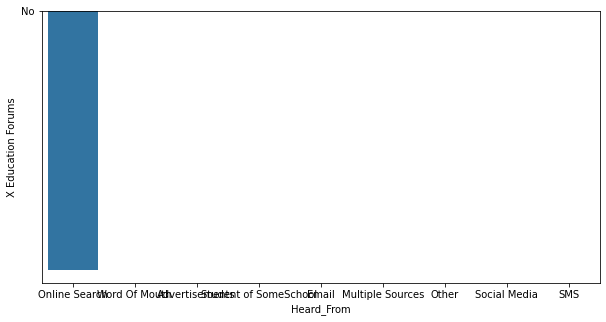

----------- Newspaper Vs Heard_From --------------------------


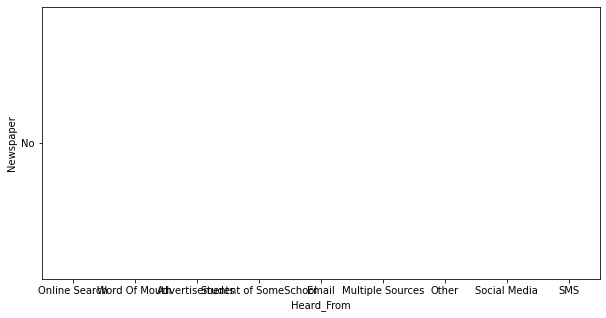

----------- Digital Advertisement Vs Heard_From --------------------------


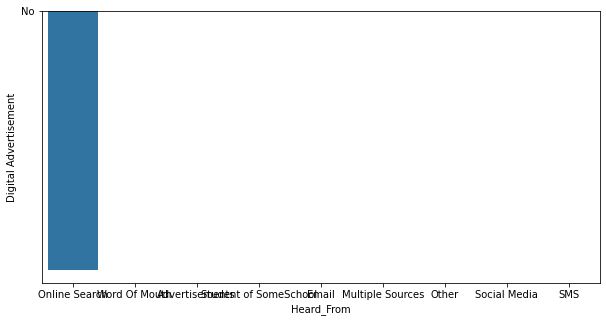

----------- Through Recommendations Vs Heard_From --------------------------


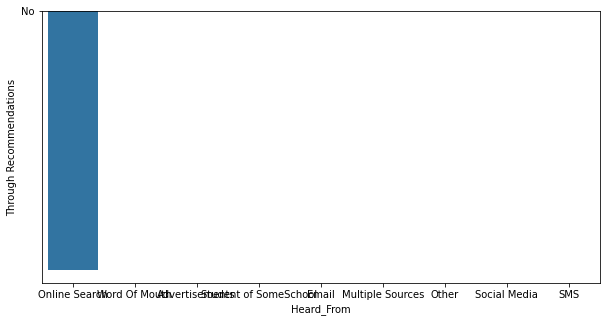

----------- Lead Profile Vs Heard_From --------------------------


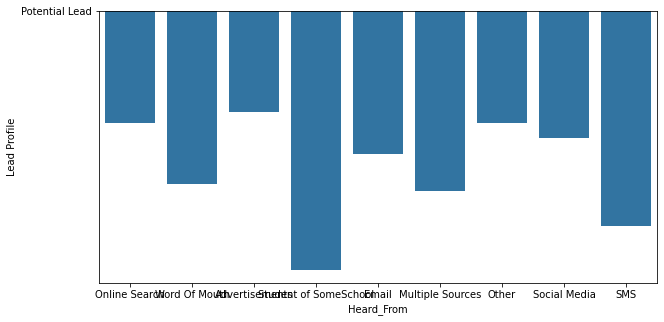

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
for i in df.columns:
    print("-----------",i,"Vs Heard_From","--------------------------")
    sns.barplot(x=df["Heard_From"],y=df[i],ci=None)
    plt.show()

----------- Lead Origin Vs Reason_to_Choose --------------------------


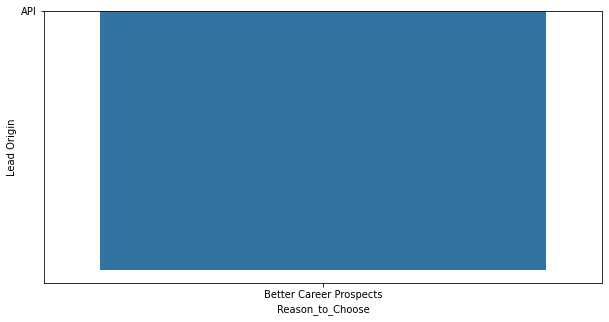

----------- Lead Source Vs Reason_to_Choose --------------------------


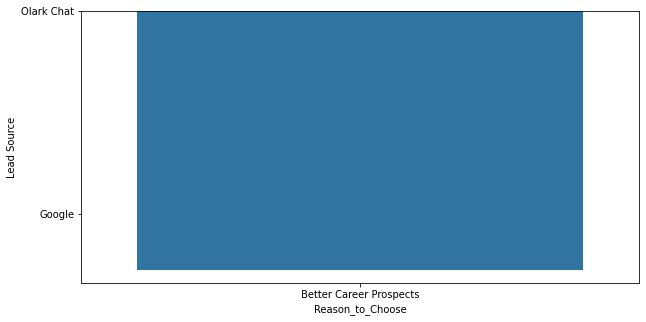

----------- Converted Vs Reason_to_Choose --------------------------


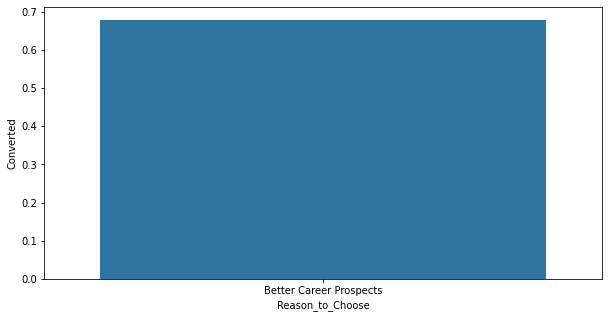

----------- TotalVisits Vs Reason_to_Choose --------------------------


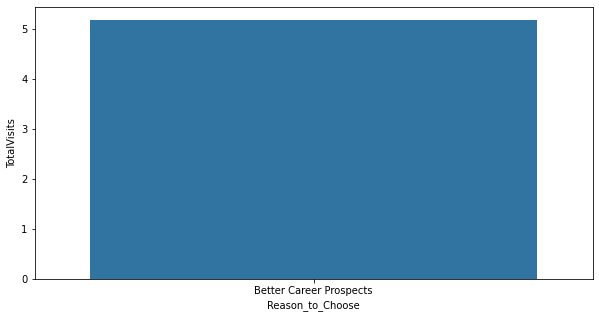

----------- Time_Spent_Website Vs Reason_to_Choose --------------------------


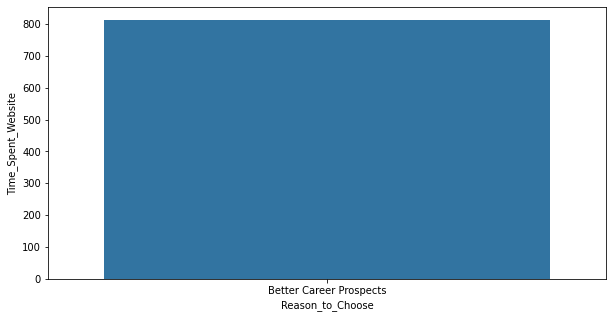

----------- Pages_Viewed Vs Reason_to_Choose --------------------------


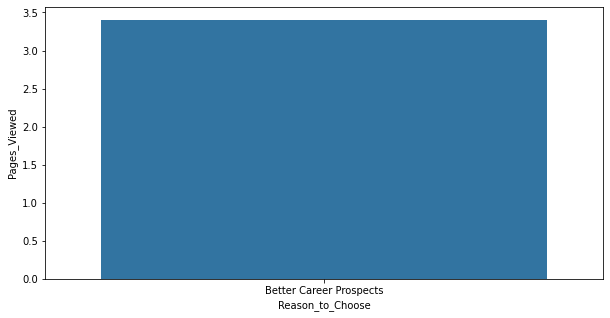

----------- Heard_From Vs Reason_to_Choose --------------------------


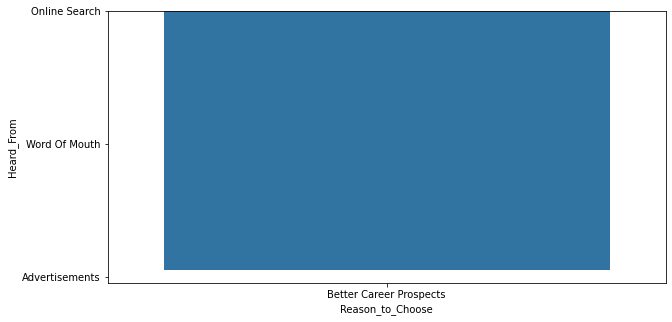

----------- Current_Occupation Vs Reason_to_Choose --------------------------


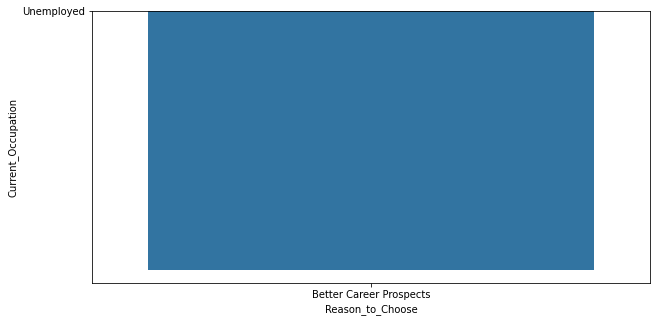

----------- Reason_to_Choose Vs Reason_to_Choose --------------------------


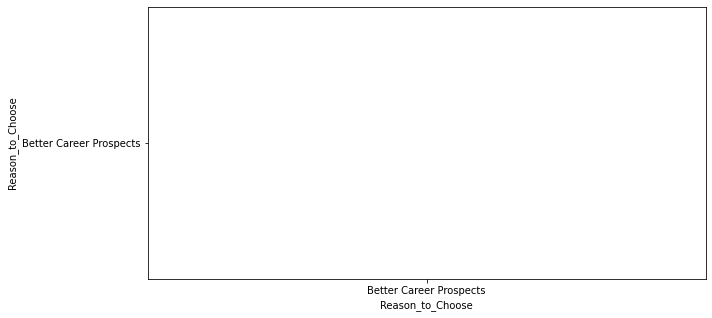

----------- Search Vs Reason_to_Choose --------------------------


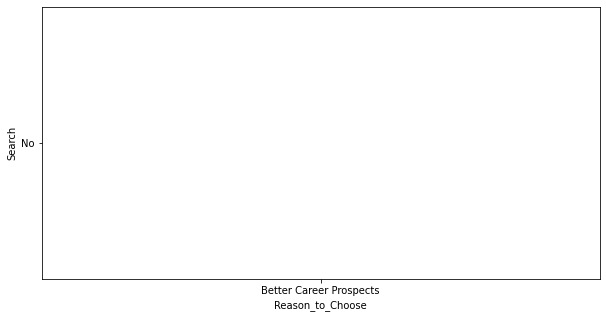

----------- Magazine Vs Reason_to_Choose --------------------------


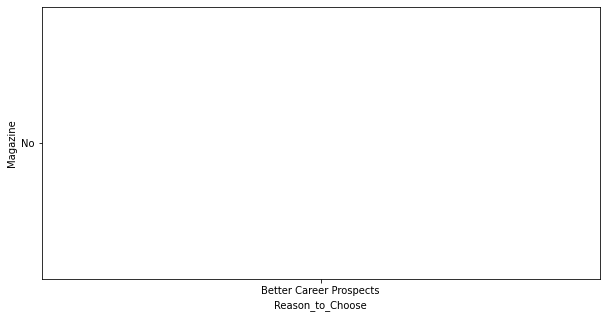

----------- Newspaper Article Vs Reason_to_Choose --------------------------


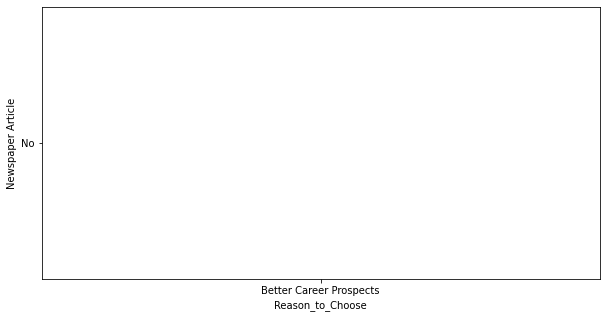

----------- X Education Forums Vs Reason_to_Choose --------------------------


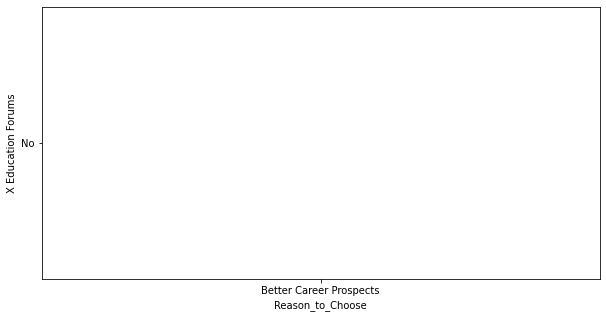

----------- Newspaper Vs Reason_to_Choose --------------------------


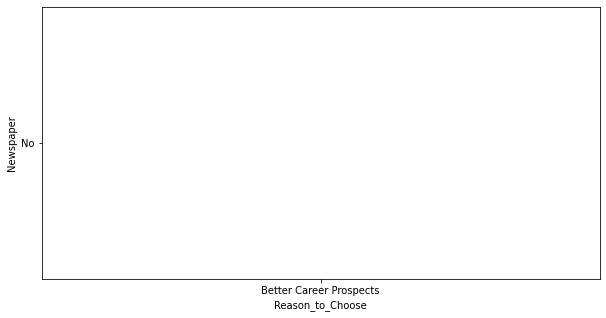

----------- Digital Advertisement Vs Reason_to_Choose --------------------------


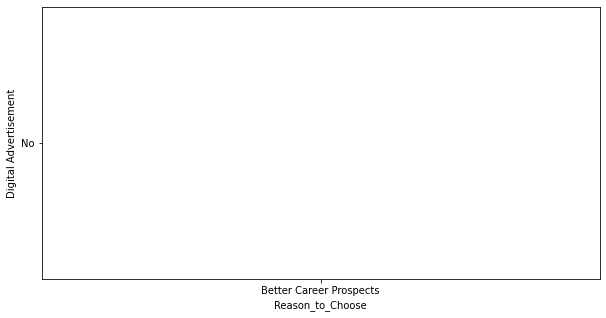

----------- Through Recommendations Vs Reason_to_Choose --------------------------


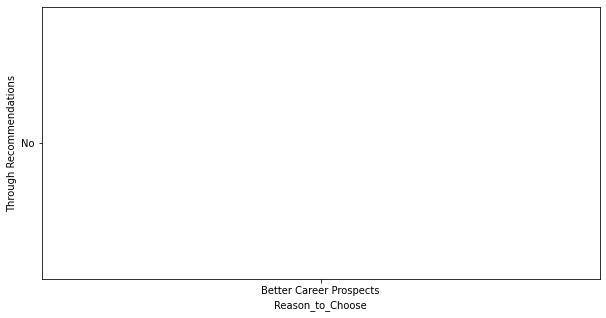

----------- Lead Profile Vs Reason_to_Choose --------------------------


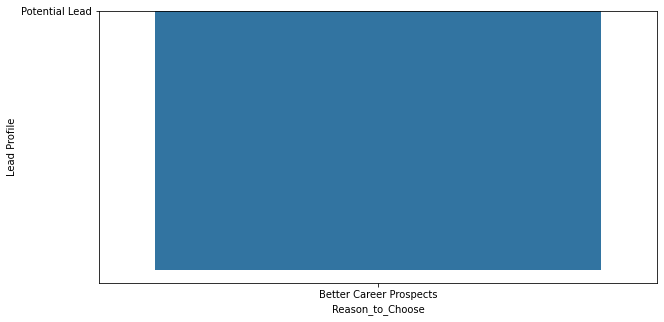

In [20]:
plt.rcParams['figure.figsize'] = [10, 5]
for i in df.columns:
    print("-----------",i,"Vs Reason_to_Choose","--------------------------")
    sns.barplot(x=df["Reason_to_Choose"],y=df[i],ci=None)
    plt.show()

----------- Lead Origin Vs Lead Profile --------------------------


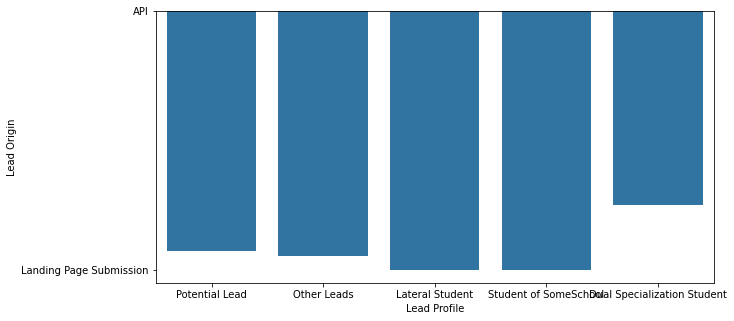

----------- Lead Source Vs Lead Profile --------------------------


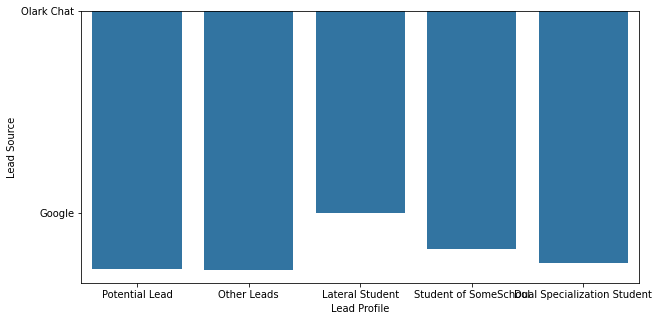

----------- Converted Vs Lead Profile --------------------------


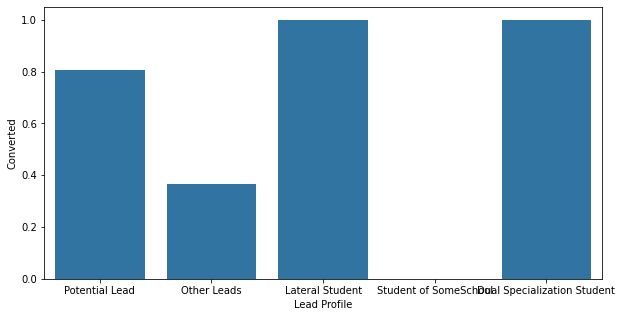

----------- TotalVisits Vs Lead Profile --------------------------


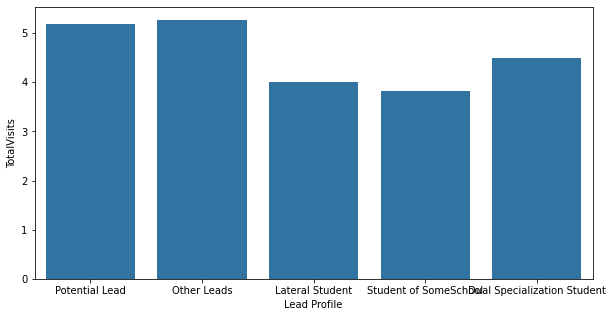

----------- Time_Spent_Website Vs Lead Profile --------------------------


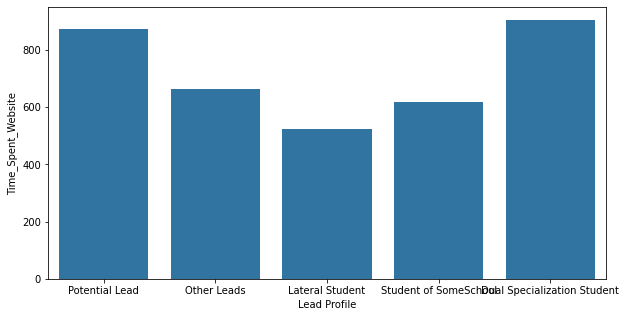

----------- Pages_Viewed Vs Lead Profile --------------------------


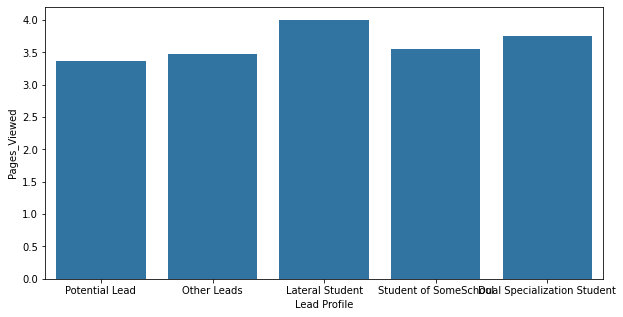

----------- Heard_From Vs Lead Profile --------------------------


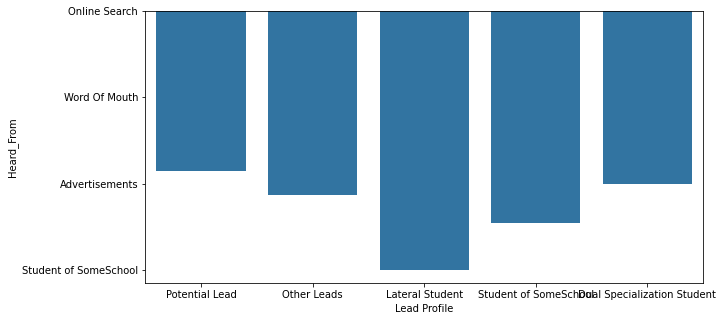

----------- Current_Occupation Vs Lead Profile --------------------------


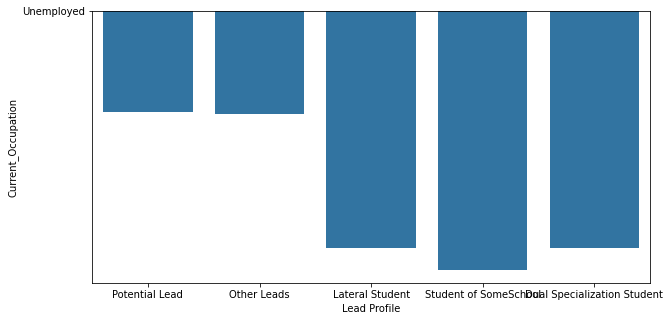

----------- Reason_to_Choose Vs Lead Profile --------------------------


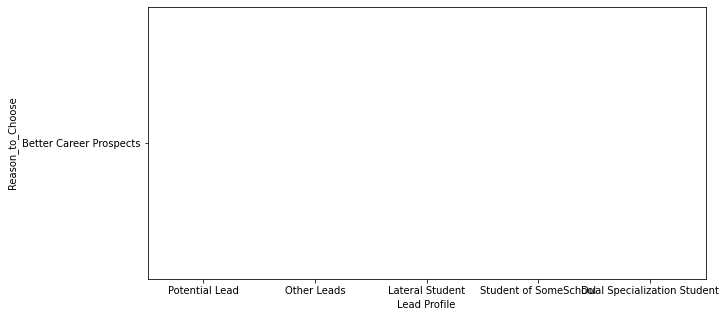

----------- Search Vs Lead Profile --------------------------


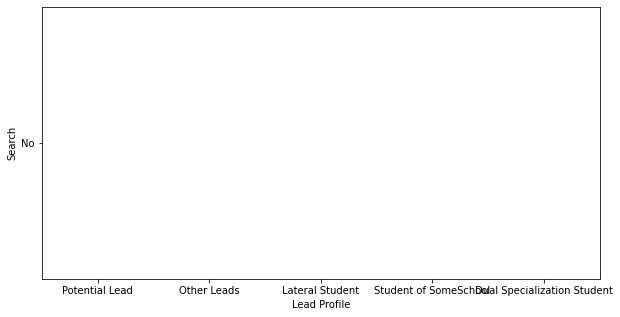

----------- Magazine Vs Lead Profile --------------------------


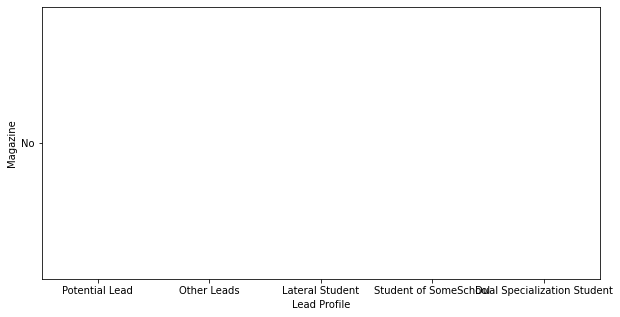

----------- Newspaper Article Vs Lead Profile --------------------------


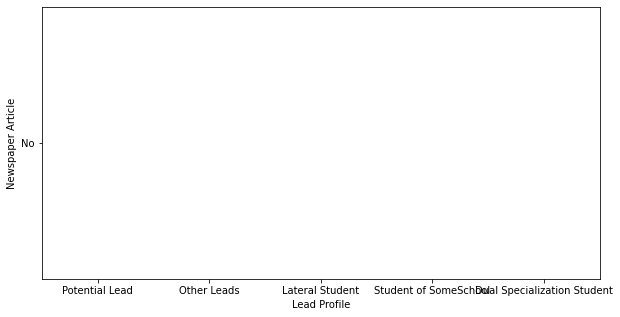

----------- X Education Forums Vs Lead Profile --------------------------


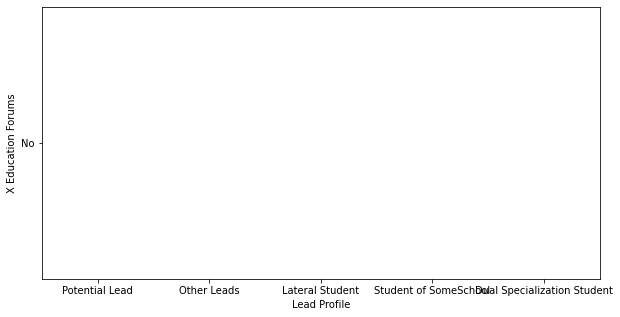

----------- Newspaper Vs Lead Profile --------------------------


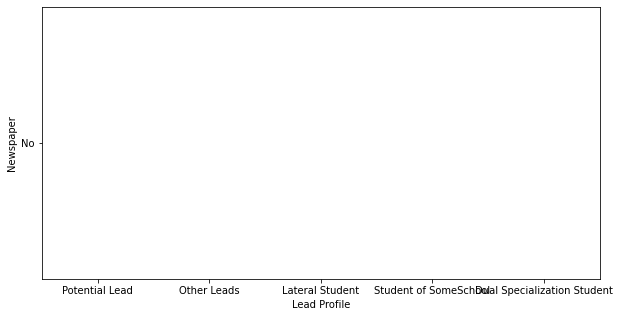

----------- Digital Advertisement Vs Lead Profile --------------------------


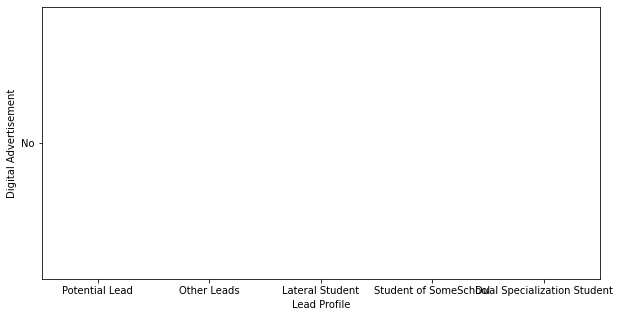

----------- Through Recommendations Vs Lead Profile --------------------------


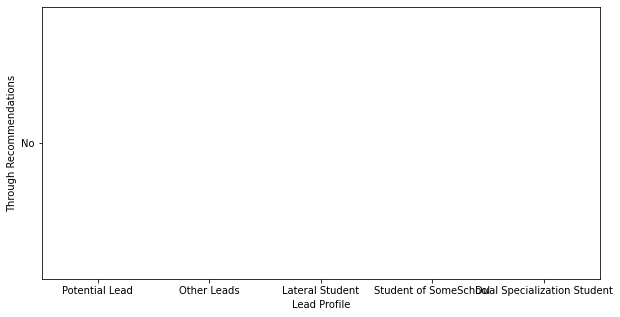

----------- Lead Profile Vs Lead Profile --------------------------


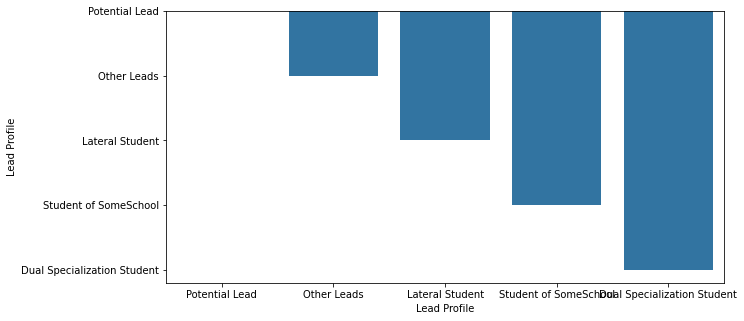

In [21]:
plt.rcParams['figure.figsize'] = [10, 5]
for i in df.columns:
    print("-----------",i,"Vs Lead Profile","--------------------------")
    sns.barplot(x=df["Lead Profile"],y=df[i],ci=None)
    plt.show()


### Preprocessing Data

In [22]:
mod=df["Reason_to_Choose"].mode()[0]
df["Reason_to_Choose"]=df["Reason_to_Choose"].fillna(mod)

In [23]:
mod=df["Lead Origin"].mode()[0]
df["Lead Origin"]=df["Lead Origin"].fillna(mod)

In [24]:
mod=df["Heard_From"].mode()[0]
df["Heard_From"]=df["Heard_From"].fillna(mod)

In [25]:
mod=df["Lead Source"].mode()[0]
df["Lead Source"]=df["Lead Source"].fillna(mod)

In [26]:
mod=df["Lead Profile"].mode()[0]
df["Lead Profile"]=df["Lead Profile"].fillna(mod)

In [27]:
mod=df["Current_Occupation"].mode()[0]
df["Current_Occupation"]=df["Current_Occupation"].fillna(mod)

In [28]:
med=df["TotalVisits"].median()
df["TotalVisits"]=df["TotalVisits"].fillna(med)

In [29]:
med=df["Pages_Viewed"].median()
df["Pages_Viewed"]=df["Pages_Viewed"].fillna(med)

In [30]:
df["Search"]=df["Search"].map({"No":0,"Yes":1})

In [31]:
df["Magazine"]=df["Magazine"].map({"No":0,"Yes":1})

In [32]:
df["Newspaper Article"]=df["Newspaper Article"].map({"No":0,"Yes":1})

In [33]:
df["X Education Forums"]=df["X Education Forums"].map({"No":0,"Yes":1})

In [34]:
df["Newspaper"]=df["Newspaper"].map({"No":0,"Yes":1})

In [35]:
df["Digital Advertisement"]=df["Digital Advertisement"].map({"No":0,"Yes":1})

In [36]:
df["Through Recommendations"]=df["Through Recommendations"].map({"No":0,"Yes":1})

### Creating Dummies

In [37]:
dum_cols = ['Lead Origin','Heard_From','Current_Occupation','Lead Profile','Lead Source','Reason_to_Choose']

In [38]:
dum=pd.get_dummies(df[dum_cols],drop_first=True,dtype=int)
df=pd.concat([df,dum],axis=1)

In [39]:
df=df.drop(dum_cols,axis=1)

In [40]:
X=df.drop("Converted",axis=1)
y=df["Converted"]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [42]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (2585, 44)
Test X shape: (647, 44)
Train y shape: (2585,)
Test y shape: (647,)


### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

### Feature Selection

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=10)
selector.fit(X_train_scaled,y_train)
selector.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False])

In [48]:
cols_to_keep=X_train_scaled.columns[selector.support_]

In [49]:
cols_to_keep

Index(['Time_Spent_Website', 'Lead Origin_Lead Add Form',
       'Heard_From_Multiple Sources', 'Heard_From_Online Search',
       'Heard_From_SMS', 'Current_Occupation_Working Professional',
       'Lead Profile_Student of SomeSchool', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_google'],
      dtype='object')

In [50]:
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

### Model building

In [51]:
import statsmodels.api as sm

#### First Model

In [52]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [53]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2575
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -978.65
Date:                Tue, 21 May 2024   Deviance:                       1957.3
Time:                        10:51:09   Pearson chi2:                 2.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2662
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7555      0.141    -12.481      0.000      -2.031      -1.480
Time_Spent_Website                          4.9207      0.237     20.733      0.000       4.455       5.386
Lead Origin_Lead Add Form                  12.1810   2.14e+04      0.001      1.000    -4.2e+04     4.2e+04
Heard_From_Multiple Sources                -0.7322      0.366     -2.001      0.045      -1.449      -0.015
Heard_From_Online Search                   -1.0404      0.138     -7.527      0.000      -1.311      -0.770
Heard_From_SMS                             -0.8427      0.760     -1.110      0.267      -2.331       0.646
Current_Occupation_Working Professional     3.0501      0.429      7.106      0.000       2.209       3.891
Lead Profile_Student of SomeSchool        -23.9259    2.1e+04     -0.001      0.999   -4.13e+04    4.12e+04
Lead Source_Reference                      12.1810   2.14e+04      0.001      1.000    -4.2e+04     4.2e+04
Lead Source_Referral Sites                 -0.9376      0.537     -1.746      0.081      -1.990       0.115
Lead Source_google                        -22.4907   3.66e+04     -0.001      1.000   -7.17e+04    7.16e+04
===========================================================================================================
"""

In [54]:
X_train_sm=X_train_sm.drop(["Lead Source_google"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Source_google"],axis=1)

#### Second Model

In [55]:
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2576
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -979.85
Date:                Tue, 21 May 2024   Deviance:                       1959.7
Time:                        10:55:28   Pearson chi2:                 2.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2655
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7547      0.141    -12.478      0.000      -2.030      -1.479
Time_Spent_Website                          4.9180      0.237     20.728      0.000       4.453       5.383
Lead Origin_Lead Add Form                  11.6815    1.3e+04      0.001      0.999   -2.55e+04    2.55e+04
Heard_From_Multiple Sources                -0.7432      0.365     -2.039      0.041      -1.458      -0.029
Heard_From_Online Search                   -1.0425      0.138     -7.544      0.000      -1.313      -0.772
Heard_From_SMS                             -1.0707      0.737     -1.453      0.146      -2.515       0.373
Current_Occupation_Working Professional     3.0520      0.429      7.110      0.000       2.211       3.893
Lead Profile_Student of SomeSchool        -22.9248   1.28e+04     -0.002      0.999    -2.5e+04     2.5e+04
Lead Source_Reference                      11.6815    1.3e+04      0.001      0.999   -2.55e+04    2.55e+04
Lead Source_Referral Sites                 -0.9348      0.537     -1.741      0.082      -1.987       0.118
===========================================================================================================
"""

In [56]:
X_train_sm=X_train_sm.drop(["Lead Source_Reference"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Source_Reference"],axis=1)

#### Third Model

In [57]:
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2576
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -979.85
Date:                Tue, 21 May 2024   Deviance:                       1959.7
Time:                        10:56:42   Pearson chi2:                 2.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2655
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7547      0.141    -12.478      0.000      -2.030      -1.479
Time_Spent_Website                          4.9180      0.237     20.728      0.000       4.453       5.383
Lead Origin_Lead Add Form                  23.3629    2.6e+04      0.001      0.999   -5.09e+04     5.1e+04
Heard_From_Multiple Sources                -0.7432      0.365     -2.039      0.041      -1.458      -0.029
Heard_From_Online Search                   -1.0425      0.138     -7.544      0.000      -1.313      -0.772
Heard_From_SMS                             -1.0707      0.737     -1.453      0.146      -2.515       0.373
Current_Occupation_Working Professional     3.0520      0.429      7.110      0.000       2.211       3.893
Lead Profile_Student of SomeSchool        -22.9248   1.28e+04     -0.002      0.999    -2.5e+04     2.5e+04
Lead Source_Referral Sites                 -0.9348      0.537     -1.741      0.082      -1.987       0.118
===========================================================================================================
"""

In [58]:
X_train_sm=X_train_sm.drop(["Lead Profile_Student of SomeSchool"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Profile_Student of SomeSchool"],axis=1)

#### Fourth Model

In [59]:
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2577
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -986.96
Date:                Tue, 21 May 2024   Deviance:                       1973.9
Time:                        10:58:38   Pearson chi2:                 2.57e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2615
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7999      0.140    -12.853      0.000      -2.074      -1.525
Time_Spent_Website                          4.8799      0.236     20.689      0.000       4.418       5.342
Lead Origin_Lead Add Form                  22.3636   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
Heard_From_Multiple Sources                -0.6845      0.364     -1.883      0.060      -1.397       0.028
Heard_From_Online Search                   -0.9868      0.137     -7.197      0.000      -1.256      -0.718
Heard_From_SMS                             -1.0101      0.736     -1.373      0.170      -2.452       0.432
Current_Occupation_Working Professional     3.0691      0.429      7.162      0.000       2.229       3.909
Lead Source_Referral Sites                 -0.9255      0.535     -1.729      0.084      -1.975       0.124
===========================================================================================================
"""

In [60]:
X_train_sm=X_train_sm.drop(["Lead Origin_Lead Add Form"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Origin_Lead Add Form"],axis=1)

#### Fifth Model

In [61]:
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2578
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -989.20
Date:                Tue, 21 May 2024   Deviance:                       1978.4
Time:                        11:00:07   Pearson chi2:                 2.57e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2602
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.7968      0.140    -12.840      0.000      -2.071      -1.523
Time_Spent_Website                          4.8730      0.236     20.679      0.000       4.411       5.335
Heard_From_Multiple Sources                -0.6855      0.364     -1.886      0.059      -1.398       0.027
Heard_From_Online Search                   -0.9841      0.137     -7.183      0.000      -1.253      -0.716
Heard_From_SMS                             -1.0104      0.736     -1.373      0.170      -2.452       0.431
Current_Occupation_Working Professional     3.0836      0.428      7.213      0.000       2.246       3.922
Lead Source_Referral Sites                 -0.9282      0.535     -1.734      0.083      -1.977       0.121
===========================================================================================================
"""

In [62]:
X_train_sm=X_train_sm.drop(["Heard_From_SMS"],axis=1)
X_test_sm=X_test_sm.drop(["Heard_From_SMS"],axis=1)

#### Sixth Model

In [63]:
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2579
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -990.22
Date:                Tue, 21 May 2024   Deviance:                       1980.4
Time:                        11:01:25   Pearson chi2:                 2.57e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2596
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8248      0.139    -13.143      0.000      -2.097      -1.553
Time_Spent_Website                          4.8658      0.235     20.683      0.000       4.405       5.327
Heard_From_Multiple Sources                -0.6554      0.363     -1.806      0.071      -1.367       0.056
Heard_From_Online Search                   -0.9542      0.135     -7.042      0.000      -1.220      -0.689
Current_Occupation_Working Professional     3.0942      0.427      7.242      0.000       2.257       3.932
Lead Source_Referral Sites                 -0.9247      0.535     -1.729      0.084      -1.973       0.123
===========================================================================================================
"""

In [64]:
X_train_sm=X_train_sm.drop(["Lead Source_Referral Sites"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Source_Referral Sites"],axis=1)

#### Seventh Model

In [65]:
model7=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2580
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -991.98
Date:                Tue, 21 May 2024   Deviance:                       1984.0
Time:                        11:02:46   Pearson chi2:                 2.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2586
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8265      0.139    -13.156      0.000      -2.099      -1.554
Time_Spent_Website                          4.8566      0.235     20.655      0.000       4.396       5.317
Heard_From_Multiple Sources                -0.6745      0.364     -1.851      0.064      -1.389       0.040
Heard_From_Online Search                   -0.9662      0.135     -7.140      0.000      -1.231      -0.701
Current_Occupation_Working Professional     3.1015      0.428      7.254      0.000       2.263       3.939
===========================================================================================================
"""

In [72]:
X_train_sm=X_train_sm.drop(["Heard_From_Multiple Sources"],axis=1)
X_test_sm=X_test_sm.drop(["Heard_From_Multiple Sources"],axis=1)


#### Eighth Model

In [73]:
model8=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result8=model8.fit()
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:                            GLM   Df Residuals:                     2581
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -993.74
Date:                Tue, 21 May 2024   Deviance:                       1987.5
Time:                        11:07:58   Pearson chi2:                 2.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2576
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8962      0.134    -14.114      0.000      -2.160      -1.633
Time_Spent_Website                          4.8449      0.235     20.639      0.000       4.385       5.305
Heard_From_Online Search                   -0.8929      0.130     -6.879      0.000      -1.147      -0.638
Current_Occupation_Working Professional     3.0940      0.428      7.232      0.000       2.255       3.932
===========================================================================================================
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,7.415006
1,Time_Spent_Website,1.071733
2,Heard_From_Online Search,1.072824
3,Current_Occupation_Working Professional,1.034980


### Evaluation

In [76]:
y_pred=result8.predict(X_train_sm)

In [77]:
train=pd.DataFrame(y_pred,columns=["Predicted_prob"])
train["Actual"]=y_train
train["Predicted_Class"]=np.where(train["Predicted_prob"]>0.5,1,0)
train=train.dropna()

In [78]:
from sklearn import metrics
print("Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted_Class"]))
print("Recall =", metrics.recall_score(train["Actual"], train["Predicted_Class"]))
print("Precision =", metrics.precision_score(train["Actual"], train["Predicted_Class"]))

Accuracy = 0.7286501377410468
Recall = 0.2
Precision = 0.192
